# 의도 분류 모델 학습 데이터 생성하기

## 0. Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Komoran
import matplotlib.pyplot as plt

## 1. 데이터 불러오기

In [3]:
movie = pd.read_csv("../../변형데이터/영화리뷰.csv")
purpose = pd.read_csv("../../변형데이터/용도별목적대화데이터.csv")
topic = pd.read_csv("../../변형데이터/주제별일상대화데이터.csv")
common_sense = pd.read_csv("../../변형데이터/일반상식.csv")
add = pd.read_csv("../../변형데이터/추가데이터.csv")

movie.dropna(inplace=True)
purpose.dropna(inplace=True)
topic.dropna(inplace=True)
common_sense.dropna(inplace=True)
add.dropna(inplace=True)

In [4]:
print(f"movie shape => {movie.shape}\n\
purpose shape => {purpose.shape}\n\
topic shape => {topic.shape}\n\
common_sense shape => {common_sense.shape}\n\
add => {add.shape}")

movie shape => (199992, 3)
purpose shape => (480494, 1)
topic shape => (1445760, 1)
common_sense shape => (68538, 3)
add => (9216, 2)


In [4]:
movie.columns

Index(['id', 'document', 'label'], dtype='object')

In [5]:
purpose.columns

Index(['text'], dtype='object')

In [6]:
topic.columns

Index(['text'], dtype='object')

In [7]:
common_sense.columns

Index(['intent', 'query', 'answer'], dtype='object')

In [8]:
add.columns

Index(['query', 'intent'], dtype='object')

In [6]:
all_data = list(movie['document']) + list(purpose['text']) + list(topic['text']) + list(common_sense['query']) \
+ list(common_sense['answer']) + list(add['query'])

In [7]:
len(all_data)

2272538

In [8]:
# 통합본 생성하고 저장하기
total = pd.DataFrame({'text': all_data})
total.to_csv("../../변형데이터/통합본데이터.csv", index=False)

## 2. 의도 분류 데이터 생성하기

2 -> 번호, 3 -> 장소, 4 -> 시간, 5 -> 기타  
기타는 추후에 다시 생성 예정 - 수정중

In [9]:
number = []
place = []
time = []
etc = []

In [10]:
for i in all_data:
    if ('어디' or '장소' or '위치' or '주소') in i: 
        place.append(i)
    elif ('번호' or '전화') in i: 
        number.append(i)
    elif ('시작' or '마감' or '언제' or '기간' or '시간') in i: 
        time.append(i)
    else: 
        etc.append(i)

In [11]:
len(number)

12512

In [14]:
number_label = []
for _ in range(len(number)):
    number_label.append(2)
len(number_label)

12512

In [15]:
print(number_label)
len(place)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

29336

In [16]:
place_label = []
for _ in range(len(place)):
    place_label.append(3)
len(place_label)

29336

In [18]:
len(time)

8332

In [17]:
time_label = []
for _ in range(len(time)):
    time_label.append(4)
len(time_label)

8332

In [20]:
#import random
#random.seed(42)
#etc_sample = random.sample(etc, 20000)

In [21]:
#etc_sample_label = []
#for _ in range(len(etc_sample)):
#    etc_sample_label.append(3)
#len(etc_sample_label)

In [18]:
train_df = pd.DataFrame({'text':number+place+time,
                         'label':number_label+place_label+time_label})

In [19]:
train_df.head()

,text,label
0,이 영화 있는사람 공유 부탁합니다 제 폰번호 010 4427 2774 연락한통만요^-^;,2
1,작가때문에 1점 주려다가 영화가 너무 좋아서 10점줌비행기를 끌고 추운곳에다 추락시...,2
2,비밀번호가 뭐야? 서윤내사랑 ㅋ_ㅋ,2
3,용팔이 시르즈를 볼려면 어떻게 하는지.전화번호좀,2
4,보다 말았는데 심장 졸라 쫄깃해진다;; 근데 여주 졸라 답답함. 세면대 물기 닦는 ...,2


In [20]:
train_df.tail()

,text,label
50175,선배님들은 아이출산하고 언제쯤 생리 시작하셨나요?,4
50176,부정출혈이 있고 난 후 며칠 뒤에 생리 시작하는지 아시는분 있나요...?,4
50177,언제 시작하고 언제 끝났는지,4
50178,며칠전에 머리를 매직하고 나서부터슬슬 여자로서의 자각은 가지고 다니기 시작했는데얼마...,4
50179,가을언제 시작햇다고 끝나냐 ...,4


In [22]:
train_df[train_df['label']==2]

,text,label
0,이 영화 있는사람 공유 부탁합니다 제 폰번호 010 4427 2774 연락한통만요^-^;,2
1,작가때문에 1점 주려다가 영화가 너무 좋아서 10점줌비행기를 끌고 추운곳에다 추락시...,2
2,비밀번호가 뭐야? 서윤내사랑 ㅋ_ㅋ,2
3,용팔이 시르즈를 볼려면 어떻게 하는지.전화번호좀,2
4,보다 말았는데 심장 졸라 쫄깃해진다;; 근데 여주 졸라 답답함. 세면대 물기 닦는 ...,2
...,...,...
12507,학원에서 어쩌다 보니 어느 여자 번호를 얻었어.,2
12508,방어율 99.9라서 등번호 99로 지었냐,2
12509,다른건 몰라도 주민등록번호 유출한건 처벌 해야한다,2
12510,동영상 찍고 차량 번호 찍고 시간대 찍어서 회사측에 보내도록해 그리고 이런사람은 다...,2


In [23]:
train_df[train_df['label']==3]

,text,label
12512,"실화여서 더욱 충격, 다시는 어디에서도 일어나서는 안될 경각심을 일깨워주는 영화",3
12513,정말재밋게 봣는대요 어디서 받을수잇조?,3
12514,너무너무재밌게보고있어요! 중간부터 본방사수했지만 스토리가 탄탄하고 흥미진진해서 1화...,3
12515,역시 이정도라 도 어디냐 이런거 다시는 보기 힘들거다,3
12516,"개인적으로 메카닉 보다 좀더 잼있었고, 적이 알고보니깐 영화 거침없이 쏴라 슛뎀업에...",3
...,...,...
41843,답이 어디있을까? 답은 언제나 내 안에 있죠.,3
41844,어디서부터 어떻게 얘기를 해야할지. 차분히 얘기해봐요. 언제나 여기 있을게요.,3
41845,언제 어디로 튀어서 니 뒷통수 후려칠 지 모른다.,3
41846,언제어디서나 기분 좋게 바라 볼수 있는분!!,3


In [24]:
train_df[train_df['label']==4]

,text,label
41848,"잊을 수 없는 그대여, 6월이 되고 비가 내려야 그대가 보이기 시작합니다.",4
41849,중반부까지 진짜 몰입하고 봤는데 갑자기 러브스토리부터 깨기시작,4
41850,이것이 바로 전설의 시작,4
41851,아름다운 영화. 다만 바이올린에서 시작하여 첫사랑으로 끝나는 과정이 썩 매끄럽지만은...,4
41852,"반전, 그 시작과 끝이다",4
...,...,...
50175,선배님들은 아이출산하고 언제쯤 생리 시작하셨나요?,4
50176,부정출혈이 있고 난 후 며칠 뒤에 생리 시작하는지 아시는분 있나요...?,4
50177,언제 시작하고 언제 끝났는지,4
50178,며칠전에 머리를 매직하고 나서부터슬슬 여자로서의 자각은 가지고 다니기 시작했는데얼마...,4


In [28]:
#train_df[train_df['label']==3]

In [25]:
train_df.reset_index(drop=True, inplace=True)

In [26]:
train_df.tail()

,text,label
50175,선배님들은 아이출산하고 언제쯤 생리 시작하셨나요?,4
50176,부정출혈이 있고 난 후 며칠 뒤에 생리 시작하는지 아시는분 있나요...?,4
50177,언제 시작하고 언제 끝났는지,4
50178,며칠전에 머리를 매직하고 나서부터슬슬 여자로서의 자각은 가지고 다니기 시작했는데얼마...,4
50179,가을언제 시작햇다고 끝나냐 ...,4


In [27]:
train_df.to_csv("train_data.csv", index=False)

## 3. 적절한 패딩 길이 구하기

In [28]:
data = pd.read_csv('train_data.csv')

In [29]:
data.shape

(50180, 2)

In [30]:
tokenizer = Komoran()

In [31]:
data_tokenized = [[token+"/"+POS for token, POS in tokenizer.pos(text_)] for text_ in data['text']]

exclusion_tags = [
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            'JX', 'JC',
            'SF', 'SP', 'SS', 'SE', 'SO',
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            'XSN', 'XSV', 'XSA'
]

f = lambda x: x in exclusion_tags

data_list = []
for i in range(len(data_tokenized)):
        temp = []
        for j in range(len(data_tokenized[i])):
            if f(data_tokenized[i][j].split('/')[1]) is False:
                temp.append(data_tokenized[i][j].split('/')[0])
        data_list.append(temp)

In [32]:
num_tokens = [len(tokens) for tokens in data_list]
num_tokens = np.array(num_tokens)

# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {np.mean(num_tokens)}")
print(f"토큰 길이 최대: {np.max(num_tokens)}")
print(f"토큰 길이 표준편차: {np.std(num_tokens)}")

토큰 길이 평균: 7.61135910721403
토큰 길이 최대: 69
토큰 길이 표준편차: 5.037248115716786


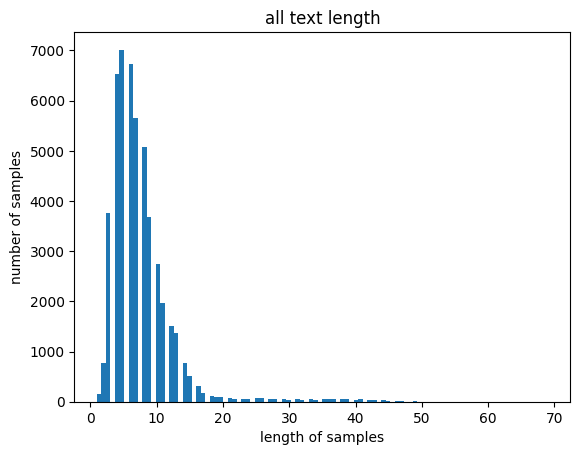

In [33]:
plt.title('all text length')
plt.hist(num_tokens, bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [34]:
select_length = 25

def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
        
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
    
below_threshold_len(select_length, data_list)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 0.9825827022718214
